# Exploratory Data Analysis -- Sports
## Sparks foundation 
### Name : Rukhsar Attaullah 


# Steps to perform EDA :


1. Importing the required libraries 


2. Importing the datasets 

    - Matches.csv
    
    - Deliveries.csv
    
 
3. Understanding the variables in the datasets


4. Preparing data for EDA

    - Checking for duplicates with spelling errors
    
    - Removing any useless or redundant variable
    
    - Checking for missing values 
    

5. Checking the relationships between variables


6. Visualizing the data

Step1 : Importing the required libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from jupyterthemes import jtplot

Step 2 : Importing and converting csv files into pandas DataFrames

In [6]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

Using info() to get a summary of matches_df

In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

 using describe()to get the statistical summary of matches_df

In [8]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Checking for any null values by isna() and adding the result by .sum()

In [9]:
matches_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Umpire3 column has the most null values
since umpire columns are not neccesary in this analysis.
Drop these columns 


In [10]:
matches_df = matches_df.drop(columns='umpire3', axis=1)

Checking the data where city is null

In [11]:
matches_df.loc[matches_df['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


There are 7 missing city values for matches held in dubai stadium,
hence replacing null cities with 'dubai'


In [12]:
matches_df['city'].fillna('Dubai', inplace=True)

In [13]:
matches_df.loc[matches_df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [14]:
#list the match ids to check innings data to find out the winner team to fill the missing values.
missing_win = matches_df.loc[matches_df['winner'].isnull()]['id'].values.tolist()

#Check the maximum number of match overs that missing the winner's data.
deliveries_df.loc[deliveries_df['match_id'].isin(missing_win)].groupby(['match_id','inning'])[['over']].max()

over
match_id inning      
301      1         11
546      1         20
571      1         20
         2          2
11340    1          5
         2          4

In [15]:
 #checking records from player of the match missing values 
matches_df.loc[matches_df['player_of_match'].isnull()] 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [16]:
matches_df['winner'].fillna('NA', inplace = True)
matches_df['player_of_match'].fillna('NA', inplace = True)

Rechecking the missing values.


In [17]:
matches_df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

Checking the list of teams to find any possible duplicates or spell errors

In [18]:
#Check the unique number of teams
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Rising Pune supergiant and rising pune supergiants are the same team
Delhi Daredevils is the former name for Delhi capitals
therefore , we need to update the names
im using lambda functions to do so.

In [19]:
# Fixing the spelling mistake in rising pune supergiants
matches_df['team1'] = matches_df['team1'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
matches_df['team2'] = matches_df['team2'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
matches_df['toss_winner'] = matches_df['toss_winner'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')
matches_df['winner'] = matches_df['winner'].apply(lambda x:x if ('Rising Pune' not in x) else 'Rising Pune Supergiant')

# Updating Delhi daredevils
matches_df['team1'] = matches_df['team1'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
matches_df['team2'] = matches_df['team2'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
matches_df['toss_winner'] = matches_df['toss_winner'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')
matches_df['winner'] = matches_df['winner'].apply(lambda x:x if ('Delhi' not in x) else 'Delhi Capitals')

Rechecking team names

In [20]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

Checking the list of cities and venues to find any possible duplicates or spell errors

In [21]:
matches_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

Bengaluru,Bangalore and Mohali,Chandigarh are the same cities. Hence need to be updated


In [22]:
#Creating a dictionary for updating city names.
city = {'Bengaluru':'Bangalore','Mohali':'Chandigarh'} 
matches_df['city'] = matches_df['city'].apply(lambda x:city[x] if x in city.keys() else x)


Checking venue names

In [23]:
matches_df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

There are multiple values pointing to the same venue.

In [24]:
#Create a dictionary for updating venue names.
unique_venue = {'Bangalore':'M. Chinnaswamy Stadium', 'Chandigarh':'Punjab Cricket Association Stadium, Mohali',
                'Chennai':'M. A. Chidambaram Stadium', 'Delhi':'Feroz Shah Kotla Ground', 
                'Hyderabad': 'Rajiv Gandhi Intl. Cricket Stadium', 'Pune': 'Maharashtra Cricket Association Stadium',
                'Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'}

def update_venue_name(x):
    if x['city'] in unique_venue.keys():
        x['venue'] = unique_venue[x['city']]
    return (x['venue'])
matches_df['venue']= matches_df.apply(update_venue_name, axis=1) #update the venue column by correcting venue names

In [25]:
matches_df['venue'].unique()

array(['Rajiv Gandhi Intl. Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla Ground',
       'Punjab Cricket Association Stadium, Mohali', 'Green Park',
       'Sawai Mansingh Stadium', 'M. A. Chidambaram Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stad

Now checking deliveries_df for the same things

Using info() to get a summary of matches_df

In [26]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

 using describe()to get the statistical summary of deliveries_df

In [27]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Checking for any null values by isna() and adding the result by .sum()

In [28]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

filling in missing values and dropping the duplicates

In [29]:
deliveries_df['player_dismissed'].fillna(value='NA', inplace=True)

In [30]:
deliveries_df.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NA,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NA,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NA,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NA,NaN,NaN


## Now we visualize the data 

Plotting for number of matches played in each city

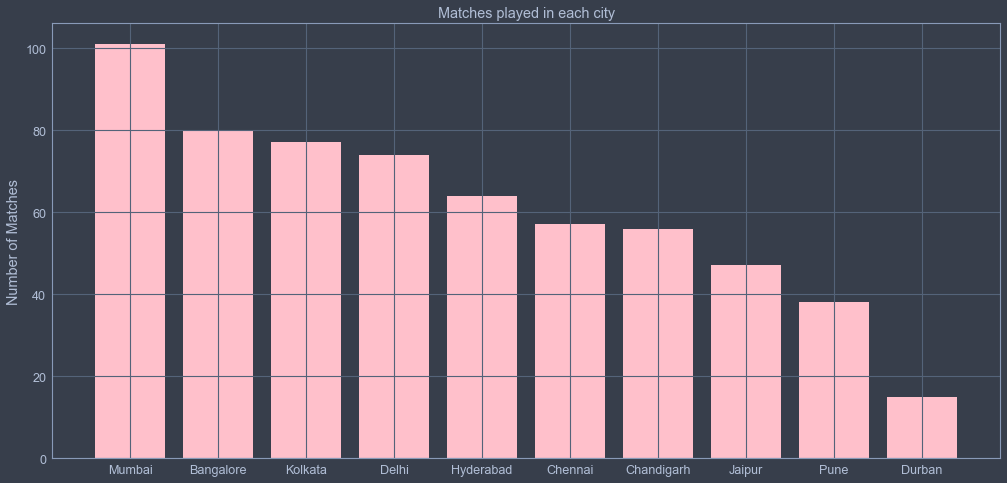

In [40]:
plt.figure(figsize=(17, 8))
plt.bar(matches_df['city'].value_counts()[:10].index,matches_df['city'].value_counts()[:10].values,color ='pink')
plt.title('Matches played in each city')
plt.ylabel('Number of Matches')
plt.show()

Visualizing top 5 venues

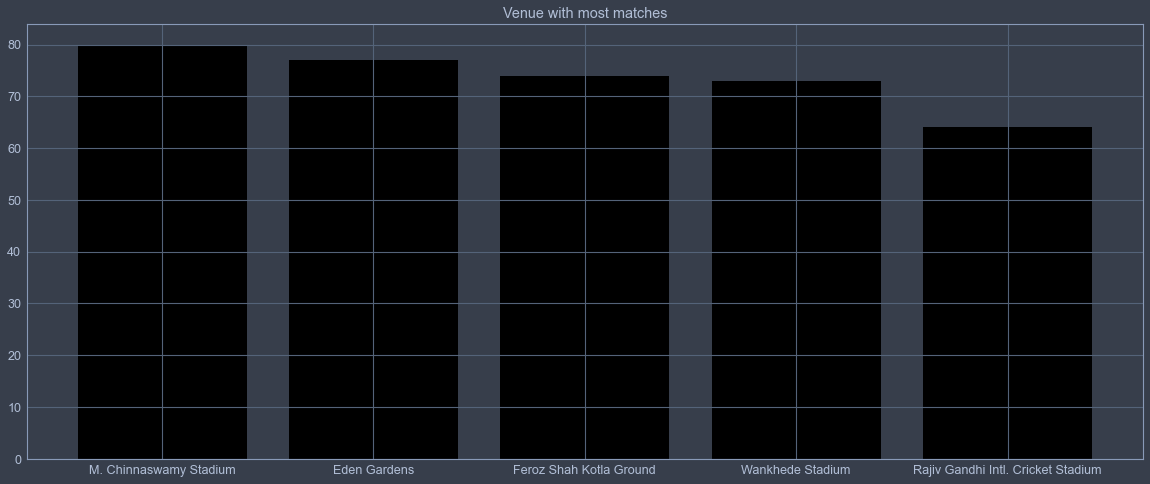

In [41]:
plt.figure(figsize=(20, 8))
plt.bar(matches_df['venue'].value_counts()[:5].index,matches_df['venue'].value_counts()[:5].values, color ='black')
plt.title('Venue with most matches')

plt.show()

Visualizing number of matches in each season

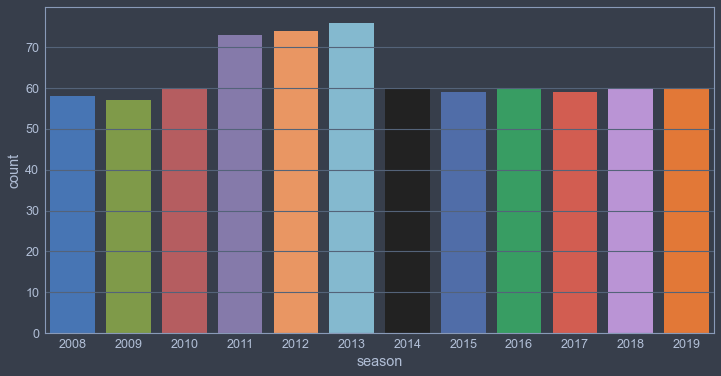

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_df)
plt.show()

Visualizing number of times each team won

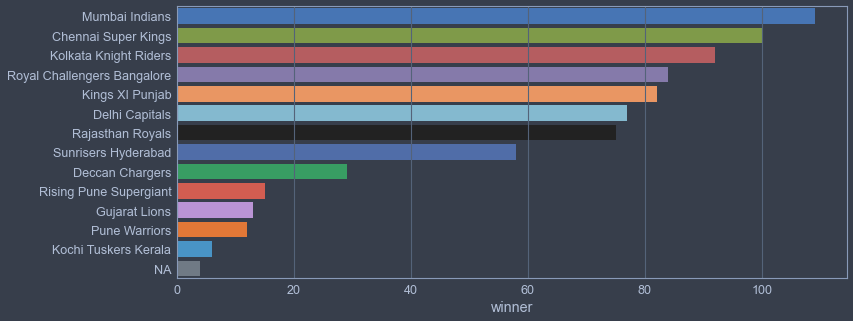

In [43]:
plt.figure(figsize=(12,5))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

visualising the ratio of teams choosing to field or bat first

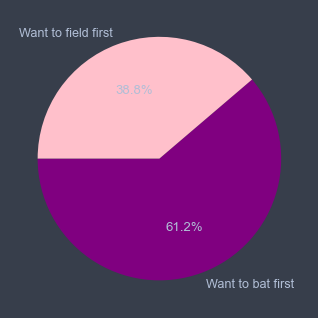

In [44]:
toss_df = matches_df.toss_decision.value_counts()
labels = ['Want to bat first','Want to field first']
sizes = (np.array((toss_df / toss_df.sum())*100))
colors = ['purple', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.show()
          

visualizing the win percentage of teams batting second,Since there is a very strong trend towards batting second 


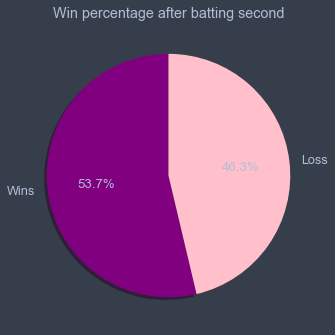

In [45]:
wins = (matches_df.win_by_wickets>0).sum()
loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(wins + loss)
sizes = [(wins/total)*100, (loss/total)*100]
colors = ['purple', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage after batting second")
plt.show()

Visualizing the dissmissal types

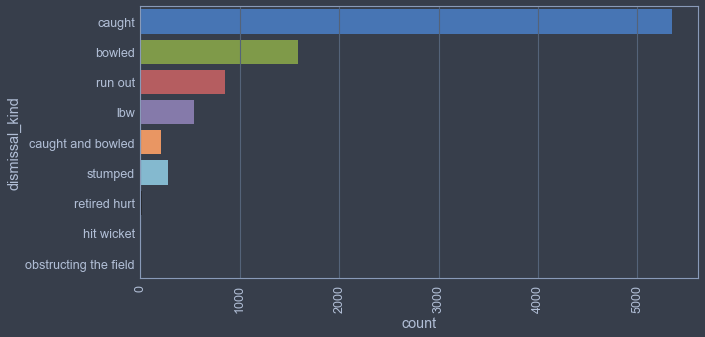

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(y='dismissal_kind', data=deliveries_df)
plt.xticks(rotation='vertical')
plt.show()

Finding the player with most 'player of the match' awards

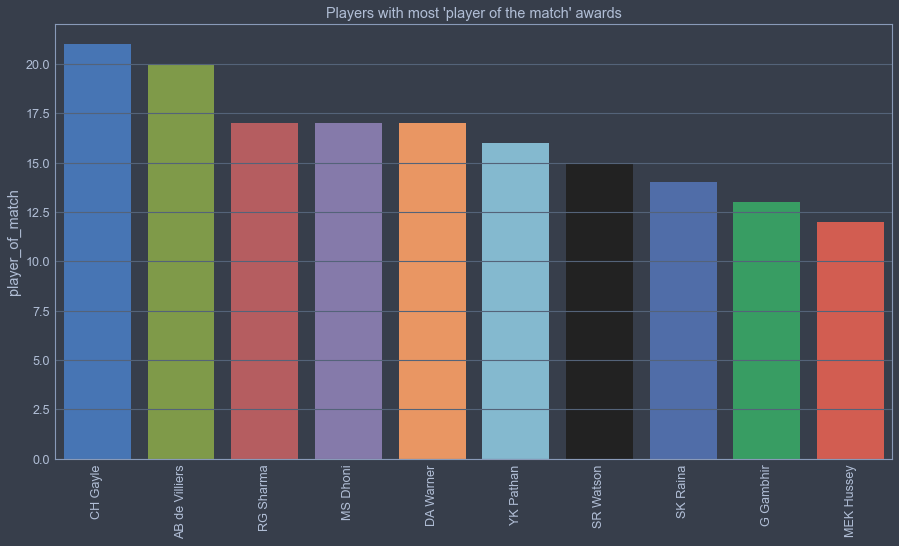

In [47]:
top_players = matches_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title("Players with most 'player of the match' awards")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

Visualizing the top scorers by deliveries_df

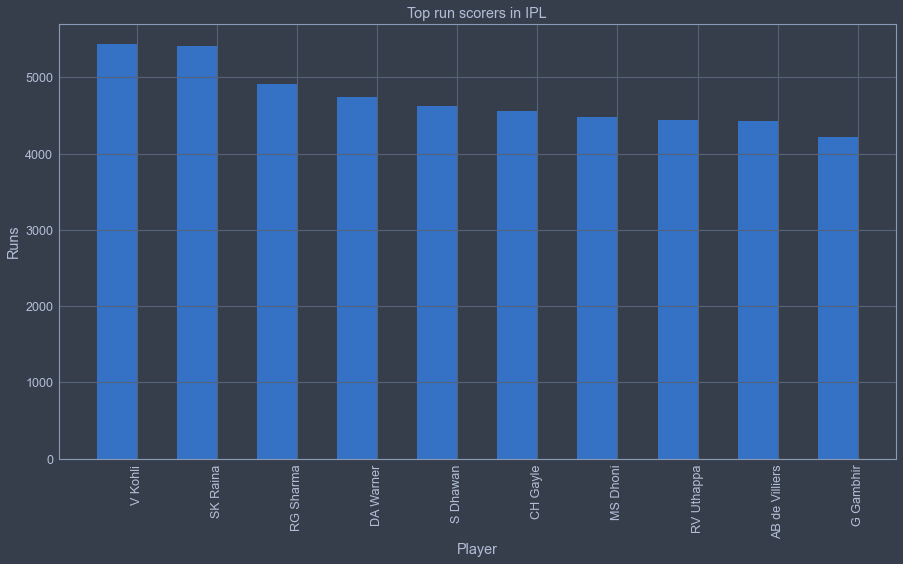

In [49]:
temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=0.5)
ax.set_xticks(ind+(0.5/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Runs")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Player')
plt.show()

Plotting for players who hit most boundaries

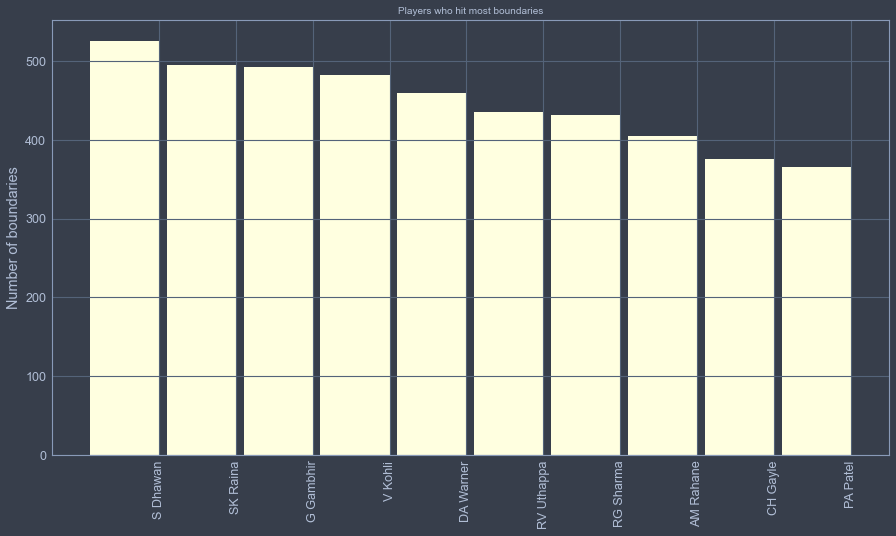

In [54]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color ='lightyellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Number of boundaries")
ax.set_title("Players who hit most boundaries",fontsize = 10)
plt.show()

In [ ]:
plotting for batsman who hit the most 6's

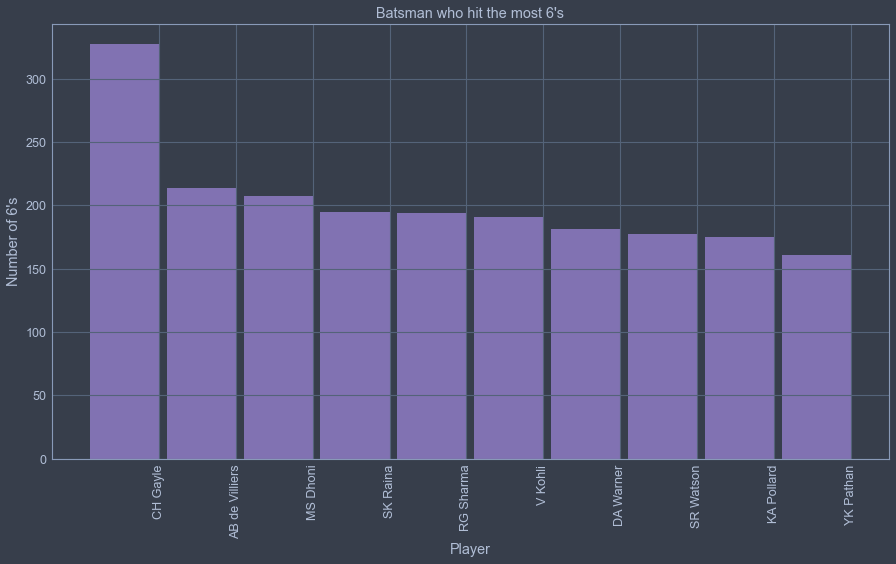

In [51]:
temp_df = deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Number of 6's")
ax.set_title("Batsman who hit the most 6's")
ax.set_xlabel('Player')
plt.show()

Team won by Maximum Runs

In [ ]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

Team won by Maximum Wickets

In [ ]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

Team won by minimum runs

In [ ]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

Team won by Minimum Wickets

In [ ]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

In [ ]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

Results

1. 2013 is the season with the most matches.
2. The city where most matches were played is mumbai
3. The stadium where most matches were played is M.Chinnaswamy.
4. Mumbai indians won the most matches
5. Ch gayle won the most 'player of the match' awards.
6. Mumbai Indians is the team which won by maximum and minimum runs.
7. Kolkata Knight Riders is the team which won by maximum and minimum wickets.
8. 61% of the toss decisions are made to field first.
9. win percentage ofteams batting second has is 53.2.
10. This does shows that batting second might or might not give an advantage
11. Sk dhawan hit the most boundaries.
12. 'Caught' is the most common dissmisal kind.
13. Ch gayle hit the most 6's.
14. Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and comapnies can also hire them to endorse products of bowling.
15. Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase
